### load in packages and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os,random, math, psutil, pickle 
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import calendar
from datetime import datetime
from  matplotlib.ticker import FuncFormatter

In [2]:
# read in train datasets
train_df = pd.read_csv('train.csv')
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [3]:
building_df = pd.read_csv('building_metadata.csv')
weather_train_df = pd.read_csv('weather_train.csv')

In [4]:
'''Reading in data'''
df = pd.read_pickle('tz_aware_merged_data_weather_imputed.pkl')

In [5]:
df['date'] = df.timestamp.dt.date
df['month']= df.timestamp.dt.month

### Charts

#### Missing meter reading data chart

In [ ]:
'''The codes below show a graph of 0 meter_reading values vs. non-zero
    values as we suspect some of these 0 values are actually missing
    data.      
    The codes below takes a long time to run. Use with caution.'''

train = train_df.set_index(['timestamp'])
f,a = plt.subplots(figsize=(11,5))
for meter in range(0,1):
    df = train[train.meter == meter].copy().reset_index()
    df['timestamp'] = df['timestamp'] - df['timestamp'].min() 
    df['timestamp'] = df['timestamp'].apply (lambda x: x.days*24+x.seconds//3600) #convert datetime to time index
    df['timestamp'] = df ['timestamp'].astype(int)
    missmap = np.empty((df.timestamp.max()+1, 1449)) # creating an empty array (building on x-axis, time on y)
    missmap.fill(np.nan)
    for i in df.values:
        if i[2] != meter:
            continue
        elif i[3] ==0:
            missmap[int(i[0]), int(i[1])] = 0 
        else:
            missmap[int(i[0]), int(i[1])] = 1
    sns.heatmap(missmap, cmap ='Paired', cbar = False)
    a.set_xlabel('Building')
    a.set_ylabel('Time')
    a.set_title('Potential Missing Meter Reading Data')

#### Mising weather and buidling data

In [ ]:
building_df.columns

In [ ]:
building_missing = pd.DataFrame(building_df.isna().sum(axis= 0 ))
building_missing=building_missing.rename(columns ={0: 'Count'})

In [ ]:
building_missing['Percent'] = building_missing['Count']/len(building_df)*100

In [ ]:
building_missing = building_missing.sort_values (by='Percent', ascending = False)
building_missing

In [ ]:
weather_missing = pd.DataFrame(weather_train_df.isna().sum(axis= 0 ))
weather_missing=weather_missing.rename(columns ={0: 'Count'})
weather_missing['Percent'] = weather_missing['Count']/len(weather_train_df)*100
weather_missing= weather_missing.sort_values (by='Percent', ascending = False)
weather_missing

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(11,5))
axes[0].bar(building_missing.index, building_missing.Percent)
axes[0].set_ylim (0,100)
axes[0].set_xticklabels(building_missing.index, rotation=45, ha='right')
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[0].set_title("Building Meta Data")
axes[0].grid(linestyle='-', linewidth='0.2', color='grey')

axes[1].bar(weather_missing.index, weather_missing.Percent)
axes[1].set_ylim (0,100)
axes[1].set_xticklabels(weather_missing.index, rotation=45, ha='right')
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())
axes[1].set_title("Weather Data")
axes[1].grid(linestyle='-', linewidth='0.2', color='grey')
fig.suptitle("Missing Explanatory Variables")
plt.show()


### final clean data charts

#### Heatmap by primary use (daily usage)

In [ ]:
df.head(5)

In [651]:
def get_num_outliers (column):
    average
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    return sum((column<q1) | (column>q3))

In [652]:
pivot_date_type = pd.pivot_table(df, index=['month'], columns=['primary_use'],values=['meter_reading'],aggfunc=np.mean)

In [653]:
xlabel = []
for key, groups in df.groupby(['primary_use']):
    xlabel += [key]

yticks =[]
for i in range (1,13):
    yticks += [calendar.month_abbr[i]]

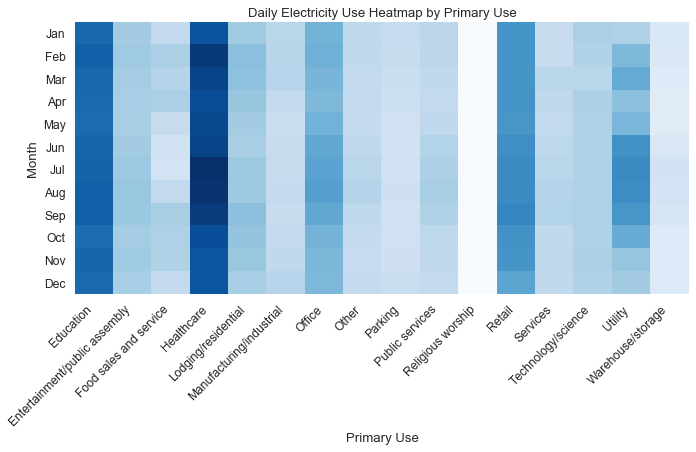

In [654]:
fig, ax = plt.subplots(figsize=(11,5))
xticks = np.array(xlabel)

sns.heatmap(pivot_date_type, cmap ='Blues',xticklabels=xticks,yticklabels=yticks, cbar = False)

ax.set_xlabel('Primary Use')
ax.set_ylabel('Month')
ax.set_title('Daily Electricity Use Heatmap by Primary Use')
ax.set_xticklabels(xticks, rotation=45, ha='right')

plt.show()

#### Heatmap by site (daily usage)

In [ ]:
pivot_site_date = pd.pivot_table(df.loc[~df.location.isna()], index=['date'], columns=['site_id'],values=['meter_reading'],aggfunc=np.sum)

In [ ]:
xlabel = []
df1= df.loc[~df.location.isna()]
mapping = df1.loc[:,df1.columns.isin(['site_id','location'])]
for key, groups in mapping.groupby(['site_id']):
    xlabel += [groups['location'].iloc[0]]



In [ ]:
xlabel

In [ ]:
fig, ax = plt.subplots(figsize=(11,5))
xticks = np.array(xlabel)

sns.heatmap(pivot_site_date, cmap ='Blues',xticklabels=xticks, cbar = False)

ax.set_xlabel('Location')
ax.set_ylabel('Date')
ax.set_title('Daily Electricity Use Heatmap by Location')
ax.set_xticklabels(xticks, rotation=45, ha='right')

plt.show()

version 2`

In [658]:
pivot_site_hour = pd.pivot_table(df.loc[~df.location.isna()], index=['month'], columns=['location'],values=['meter_reading'],aggfunc=np.sum())

TypeError: sum() missing 1 required positional argument: 'a'

In [656]:
xticks=[]
for i in pivot_site_hour.columns.to_list():
    xticks += [i[1]]
yticks =[]
for i in range (1,13):
    yticks += [calendar.month_abbr[i]]

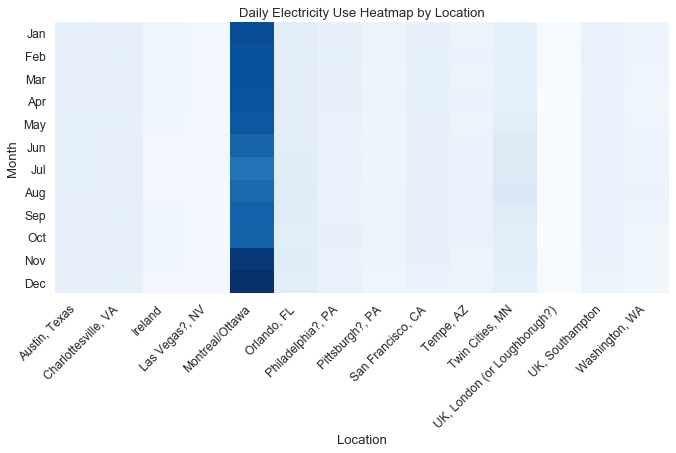

In [657]:
fig, ax = plt.subplots(figsize=(11,5))
xticks = np.array(xticks)

sns.heatmap(pivot_site_hour, cmap ='Blues',xticklabels=xticks, yticklabels=yticks, cbar = False)

ax.set_xlabel('Location')
ax.set_ylabel('Month')
ax.set_title('Daily Electricity Use Heatmap by Location')
ax.set_xticklabels(xticks, rotation=45, ha='right')

plt.show()

#### Meter reading heatmap by temperature

In [173]:
usage_by_temp = pd.DataFrame(df.groupby('air_temperature')['meter_reading'].mean())

In [174]:
usage_by_temp.head(5)

,meter_reading
air_temperature,
-28.9,213.219943
-28.8,1599.497777
-28.7,1635.050787
-28.6,1577.943651
-28.4,1593.419688


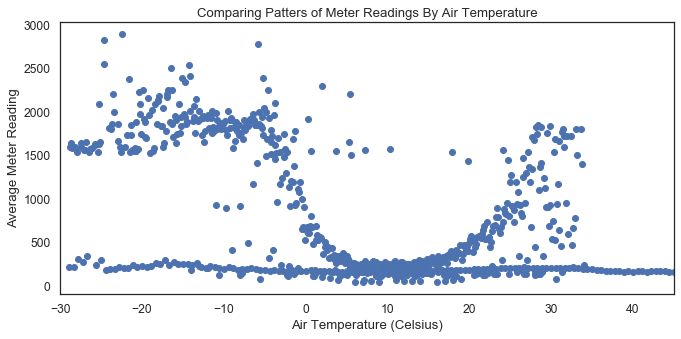

In [182]:
fig, ax = plt.subplots(figsize=(11,5))
ax.scatter(usage_by_temp.index, usage_by_temp.meter_reading)

ax.set_xlabel('Air Temperature (Celsius)')
ax.set_ylabel('Average Meter Reading')
ax.set_title('Comparing Patters of Meter Readings By Air Temperature')
ax.set_xlim(-30,45)
plt.show()

#### Distribution by primary use

In [693]:
primary_use_dist = df[['primary_use','meter_reading','date']]
pivot_use_date= pd.pivot_table(primary_use_dist, index=['primary_use'], columns=['date'],values=['meter_reading'],aggfunc=np.sum, margins= True)

In [694]:
pivot_use_date.sort_values(by=('meter_reading', 'All'), ascending=False,inplace=True)
pivot_use_date_test = pivot_use_date.unstack().reset_index().drop('level_0', axis=1)
pivot_use_date_test= pivot_use_date_test.rename(columns = {0:'meter_reading'})
pivot_use_date_test= pivot_use_date_test.loc[pivot_use_date_test.primary_use != 'All']
pivot_use_date_test= pivot_use_date_test.loc[pivot_use_date_test.date != 'All']

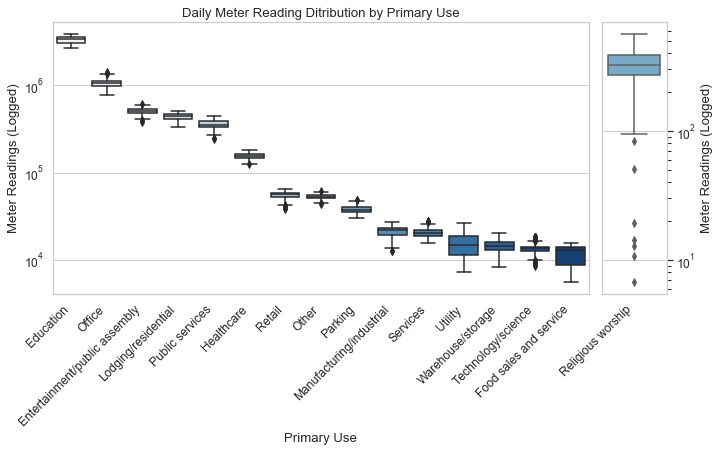

In [695]:
fig = plt.figure(figsize=(11,5))
gs = fig.add_gridspec(1, 8)

fig_ax1 = fig.add_subplot(gs[0:-1])
sns.set(style= 'whitegrid', font_scale =1.1)
sns.boxplot(x='primary_use', y='meter_reading', data=pivot_use_date_test.loc[pivot_use_date_test.primary_use !='Religious worship'], palette="Blues", ax = fig_ax1)
fig_ax1.set_yscale('log')

fig_ax1.set_xticklabels(fig_ax1.get_xticklabels(), rotation=45, ha='right')

fig_ax1.set_xlabel('Primary Use')
fig_ax1.set_ylabel('Meter Readings (Logged)')
fig_ax1.set_title('Daily Meter Reading Ditribution by Primary Use')


fig_ax2 = fig.add_subplot(gs[-1:])
fig_ax2.set_yscale('log')
sns.boxplot(x='primary_use', y='meter_reading', data=pivot_use_date_test.loc[pivot_use_date_test.primary_use =='Religious worship'], palette="Blues", ax = fig_ax2)

fig_ax2.set_xlabel('')
fig_ax2.set_ylabel('Meter Readings (Logged)')
fig_ax2.set_xticklabels(fig_ax2.get_xticklabels(), rotation=45, ha='right')
fig_ax2.yaxis.set_label_position("right")
fig_ax2.yaxis.tick_right()

plt.show()

### outliers?

In [204]:
outlier = df[['primary_use', 'site_id', 'meter_reading']]

In [153]:
outlier.describe()

,site_id,meter_reading
count,1.206231e+07,1.206231e+07
mean,6.749967e+00,1.861771e+02
std,4.946893e+00,4.009262e+02
min,0.000000e+00,-4.608884e+01
25%,3.000000e+00,2.390000e+01
50%,5.000000e+00,7.102000e+01
75%,1.200000e+01,1.848960e+02
max,1.500000e+01,7.976900e+04


In [188]:
outlier_daily = pd.DataFrame(outlier.groupby('date')['meter_reading'].mean())

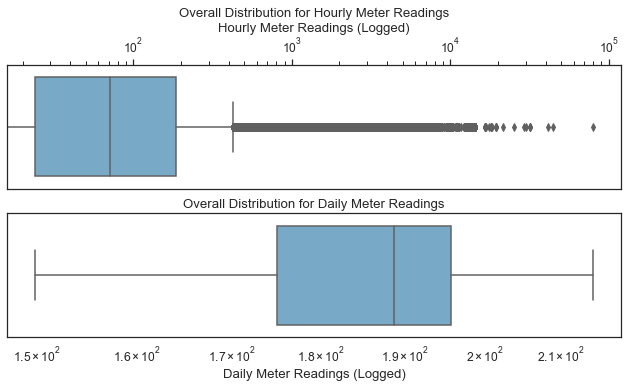

In [201]:
fig = plt.figure(figsize=(11,5))
gs = fig.add_gridspec(2, 1)

ax = fig.add_subplot(gs[0,:])
sns.boxplot(outlier_nz.meter_reading, ax = ax, palette ='Blues')

ax.set_xscale('log')
ax.set_title('Overall Distribution for Hourly Meter Readings')
ax.set_xlabel('Hourly Meter Readings (Logged)')
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

ax2 = fig.add_subplot(gs[1,:])
ax2.set_xscale('log')
ax2.set_title('Overall Distribution for Daily Meter Readings')
ax2.set_xlabel('Daily Meter Readings (Logged)')

sns.boxplot(outlier_daily, ax = ax2, palette ='Blues')

plt.show()

In [209]:
# Taking a look at the outliers
outlier_sub =df[['primary_use', 'site_id', 'meter_reading', 'hour_of_day','date','year_built']]

In [212]:
outlier_sub_1 = outlier_sub.loc[outlier_sub.meter_reading - outlier_sub.meter_reading.mean() >3*outlier_sub.meter_reading.mean() ]

In [213]:
len(outlier_sub_1)/len(outlier_sub)

0.0460278299904554

In [262]:
outlier_use = outlier_sub_1.pivot_table(index='site_id',columns= 'primary_use',values ='meter_reading',aggfunc=len)

In [273]:
outlier_use['Education'].sum()/len(outlier_sub_1)

0.614536691150248

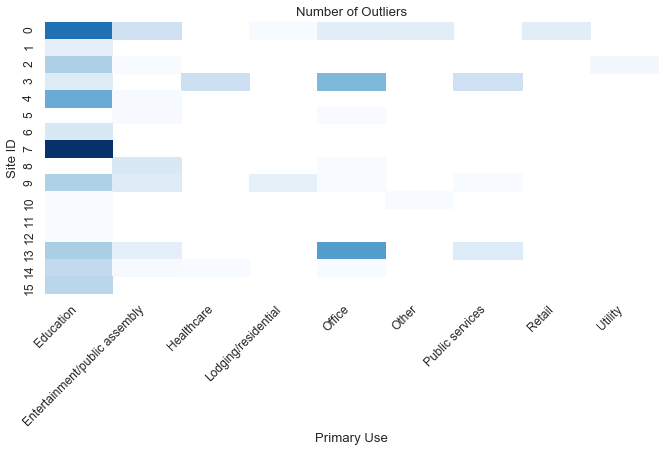

In [274]:
fig, ax = plt.subplots(figsize=(11,5))

xticks = np.array(outlier_use.columns.to_list())

sns.heatmap(outlier_use, cmap ='Blues',xticklabels=xticks, cbar = False, ax = ax)

ax.set_title('Number of Outliers')
ax.set_ylabel('Site ID')
ax.set_xlabel('Primary Use')
ax.set_xticklabels(xticks, rotation=45, ha='right')
plt.show()

In [276]:
outlier_hr_use= outlier_sub_1.pivot_table(index='hour_of_day',columns= 'primary_use',values ='meter_reading',aggfunc=len)

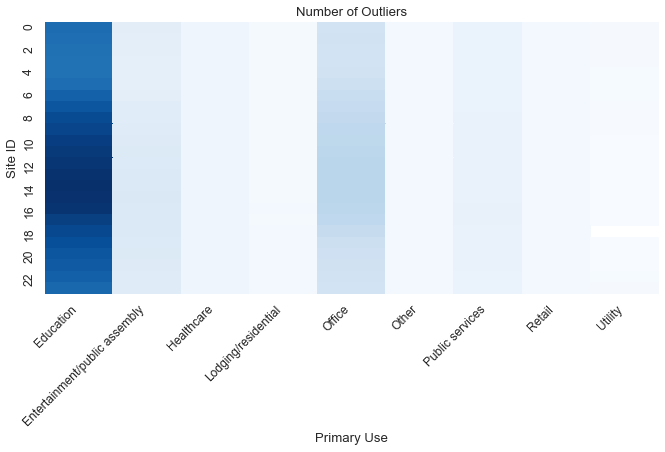

In [277]:
fig, ax = plt.subplots(figsize=(11,5))

xticks = np.array(outlier_hr_use.columns.to_list())

sns.heatmap(outlier_hr_use, cmap ='Blues',xticklabels=xticks, cbar = False, ax = ax)

ax.set_title('Number of Outliers')
ax.set_ylabel('Site ID')
ax.set_xlabel('Primary Use')
ax.set_xticklabels(xticks, rotation=45, ha='right')
plt.show()

In [384]:
#### SPikes
train_df_adj =train_df.copy()
train_df_adj ['date']= train_df['timestamp'].dt.date
train_df_adj['date'] = pd.to_datetime(train_df_adj['date'])
train_df_adj ['hour_of_day']= train_df['timestamp'].dt.hour

In [397]:
# Example 1
date ='2016-01-06'
df_spike_1= train_df_adj.loc[ (train_df_adj.building_id ==881) & (train_df_adj.date == date)]

In [420]:
# Example 1
date ='2016-11-21'
df_spike_2= train_df_adj.loc[ (train_df_adj.building_id ==53) & (train_df_adj.date == date)]

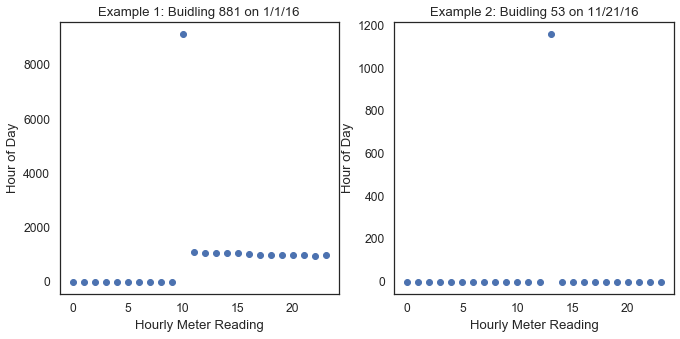

In [423]:
fig, axs = plt.subplots(1,2,figsize=(11,5))
axs[0].scatter(df_spike_1['hour_of_day'], df_spike_1['meter_reading'])
axs[0].set_title('Example 1: Buidling 881 on 1/1/16')
axs[0].set_ylabel('Hour of Day')
axs[0].set_xlabel('Hourly Meter Reading')



axs[1].scatter(df_spike_2['hour_of_day'], df_spike_2['meter_reading'])
axs[1].set_title('Example 2: Buidling 53 on 11/21/16')
axs[1].set_ylabel('Hour of Day')
axs[1].set_xlabel('Hourly Meter Reading')
plt.show()

##time of day and primary use

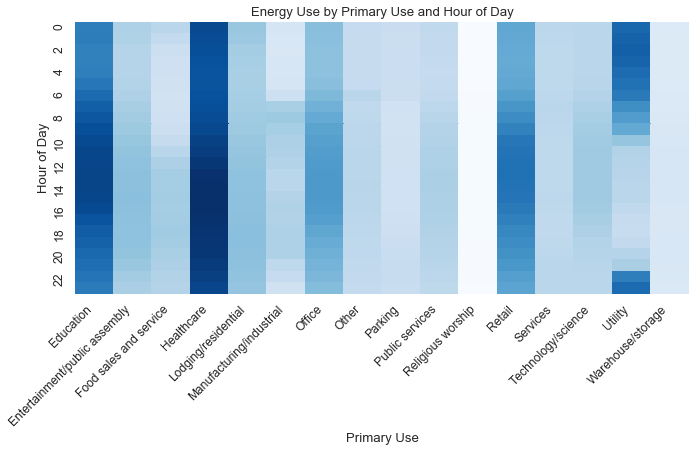

In [429]:
time_day_use= df.pivot_table(index='hour_of_day',columns= 'primary_use',values ='meter_reading',aggfunc=np.mean)
fig, ax = plt.subplots(figsize=(11,5))

xticks = np.array(time_day_use.columns.to_list())

sns.heatmap(time_day_use, cmap ='Blues',xticklabels=xticks, cbar = False, ax = ax)

ax.set_title('Energy Use by Primary Use and Hour of Day')
ax.set_ylabel('Hour of Day')
ax.set_xlabel('Primary Use')
ax.set_xticklabels(xticks, rotation=45, ha='right')
plt.show()

### Time and temperature

In [486]:
df1 = df.copy()
# df1['air_temperature'] =df1['air_temperature'].apply(lambda x: int(round(x)))

In [487]:
df1['air_temperature'].min()

-28.9

In [488]:
time_temp= df1.pivot_table(index='hour_of_day',columns= 'air_temperature',values ='meter_reading',aggfunc=np.mean)


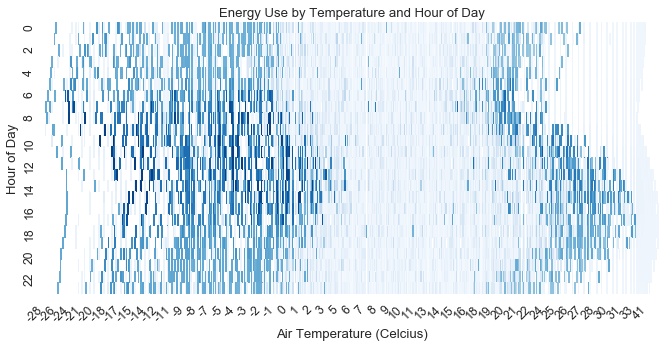

In [553]:
fig1, ax = plt.subplots(figsize=(11,5))

sns.heatmap(time_temp, cmap ='Blues', cbar = False, ax = ax)

ax.set_title('Energy Use by Temperature and Hour of Day')
ax.set_ylabel('Hour of Day')
ax.set_xlabel('Air Temperature (Celcius)')
xlabels = [int(float(item.get_text()) )for item in ax.get_xticklabels()]
ax.set_xticklabels(xlabels, rotation=45, ha='right')
plt.show()

In [549]:
labels = [int(float(item.get_text()) )for item in ax.get_xticklabels()]

## distriobution by site

In [645]:
primary_use_dist = df[['site_id','meter_reading','date']]
pivot_use_date= pd.pivot_table(primary_use_dist, index=['site_id'], columns=['date'],values=['meter_reading'],aggfunc=np.sum, margins= True)

In [646]:
pivot_use_date.sort_values(by=('meter_reading', 'All'), ascending=False,inplace=True)

In [647]:
pivot_use_date_test = pivot_use_date.unstack().reset_index().drop('level_0', axis=1)
pivot_use_date_test= pivot_use_date_test.rename(columns = {0:'meter_reading'})
pivot_use_date_test= pivot_use_date_test.loc[pivot_use_date_test.site_id != 'All']
pivot_use_date_test= pivot_use_date_test.loc[pivot_use_date_test.date != 'All']

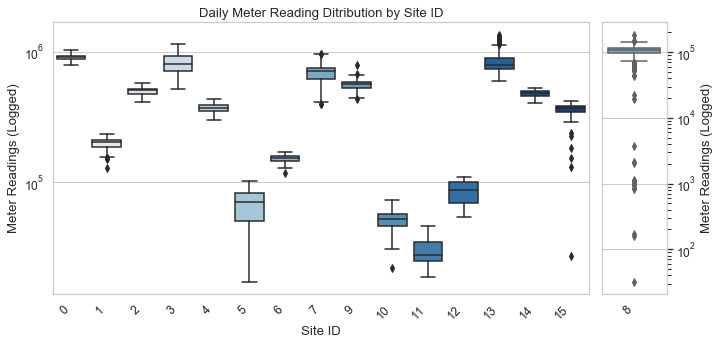

In [691]:
fig = plt.figure(figsize=(11,5))
gs = fig.add_gridspec(1, 8)

fig_ax1 = fig.add_subplot(gs[0,:-1])
sns.set(style= 'whitegrid', font_scale =1.1)
sns.boxplot(x='site_id', y='meter_reading', data=pivot_use_date_test.loc[pivot_use_date_test.site_id!=8], palette="Blues", ax = fig_ax1)
fig_ax1.set_yscale('log')

fig_ax1.set_xticklabels(fig_ax1.get_xticklabels(), rotation=45, ha='right')

fig_ax1.set_xlabel('Site ID')
fig_ax1.set_ylabel('Meter Readings (Logged)')
fig_ax1.set_title('Daily Meter Reading Ditribution by Site ID')

fig_ax2 = fig.add_subplot(gs[0,-1:])
sns.boxplot(x='site_id', y='meter_reading', data=pivot_use_date_test.loc[pivot_use_date_test.site_id ==8], palette="Blues", ax = fig_ax2)
fig_ax2.set_yscale('log')

fig_ax2.set_xticklabels(fig_ax2.get_xticklabels(), rotation=45, ha='right')

fig_ax2.set_xlabel('')
fig_ax2.set_ylabel('Meter Readings (Logged)')
fig_ax2.yaxis.set_label_position("right")
fig_ax2.yaxis.tick_right()
plt.show()

In [609]:
primary_use_dist_8 = df.loc[df.site_id ==8]
primary_use_dist_8 =primary_use_dist_8[['primary_use','meter_reading','date']]

In [611]:
pivot_use_date= pd.pivot_table(primary_use_dist_8, index=['primary_use'], columns=['date'],values=['meter_reading'],aggfunc=np.sum, margins= True)
pivot_use_date.sort_values(by=('meter_reading', 'All'), ascending=False,inplace=True)
pivot_use_date_test = pivot_use_date.unstack().reset_index().drop('level_0', axis=1)
pivot_use_date_test= pivot_use_date_test.rename(columns = {0:'meter_reading'})
pivot_use_date_test= pivot_use_date_test.loc[pivot_use_date_test.primary_use != 'All']
pivot_use_date_test= pivot_use_date_test.loc[pivot_use_date_test.date != 'All']

In [612]:
primary_use_dist_8 =pivot_use_date_test

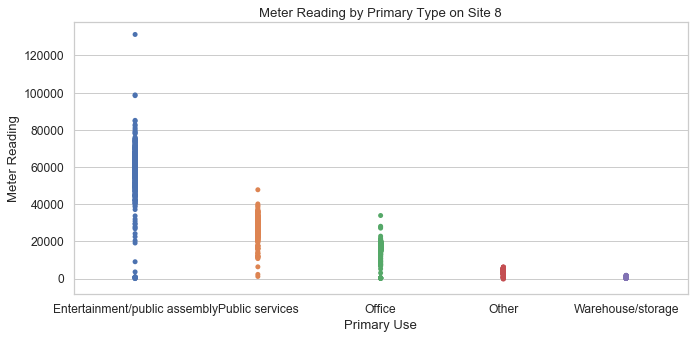

In [619]:
fig = plt.figure(figsize=(11,5))

ax = fig.add_subplot()
sns.catplot(x="primary_use", y="meter_reading", data=primary_use_dist_8, jitter=False, ax =ax)
ax.set_title('Meter Reading by Primary Type on Site 8')
ax.set_ylabel('Meter Reading')
ax.set_xlabel('Primary Use')
xlabels = [item.get_text() for item in ax.get_xticklabels()]
ax.set_xticklabels(xlabels, rotation=0, ha='center')

plt.close(2)
plt.show()

# Building charcteristic

In [662]:
building_df.isna().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [666]:
primary_use_count = pd.DataFrame(building_df.groupby('primary_use').agg(len))

In [670]:
primary_use_count= primary_use_count[['site_id']]
primary_use_count=primary_use_count.rename(columns = {'site_id': 'count'})

In [673]:
primary_use_count.sort_values(by ='count', ascending = False, inplace = True)

In [675]:
primary_use_count

,count
primary_use,
Education,549
Office,279
Entertainment/public assembly,184
Public services,156
Lodging/residential,147
Other,25
Healthcare,23
Parking,22
Warehouse/storage,13


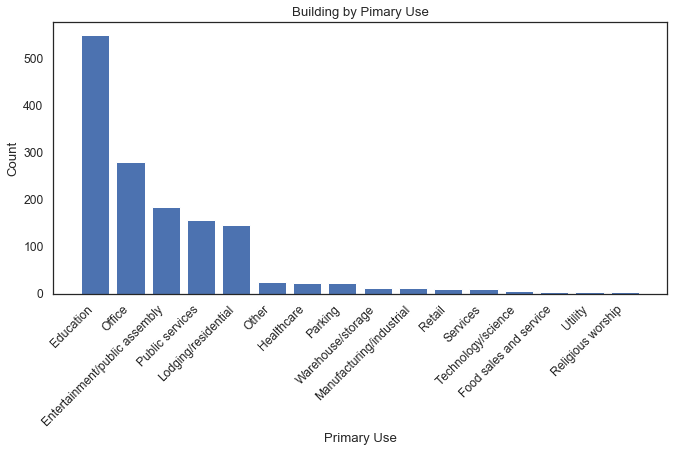

In [688]:
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot()

sns.set(style= 'white', font_scale =1.1)

ax.bar(primary_use_count.index, primary_use_count['count'])
ax.set_title('Building by Pimary Use')
ax.set_ylabel('Count')
ax.set_xlabel('Primary Use')
ax.set_xticklabels(xlabels, rotation=0, ha='center')
ax.set_xticklabels(primary_use_count.index, rotation=45, ha='right')

plt.show()


### outlier before imputation

In [6]:
outlier_before_imputation = train_df[['building_id','meter_reading']]

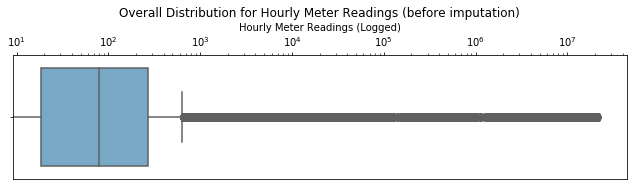

In [8]:
fig = plt.figure(figsize=(11,5))
gs = fig.add_gridspec(2, 1)

ax = fig.add_subplot(gs[0,:])
sns.boxplot(outlier_before_imputation.meter_reading, ax = ax, palette ='Blues')

ax.set_xscale('log')
ax.set_title('Overall Distribution for Hourly Meter Readings (before imputation)')
ax.set_xlabel('Hourly Meter Readings (Logged)')
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()
